In [4]:
%pip install tensorflow-metal

  Using cached tensorflow_metal-1.1.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (1.2 kB)
Using cached tensorflow_metal-1.1.0-cp311-cp311-macosx_12_0_arm64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [1]:
import tensorflow.keras as K

#import keras as K


def preprocess_data(X, Y):
        """ This method has the preprocess to train a model """
        X = X.astype('float32')
        X_p = K.applications.vgg16.preprocess_input(X)
        Y_p = K.utils.to_categorical(Y, 10)
        return(X_p, Y_p)


(Xt, Yt), (X, Y) = K.datasets.cifar10.load_data()
X_p, Y_p = preprocess_data(Xt, Yt)
Xv_p, Yv_p = preprocess_data(X, Y)
base_model = K.applications.vgg16.VGG16(include_top=False,
                                        weights='imagenet',
                                        pooling='avg'
                                        )

2024-03-21 19:21:29.932353: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-03-21 19:21:29.932378: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-21 19:21:29.932384: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-21 19:21:29.932424: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-21 19:21:29.932439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:

"""
This script has the method
preprocess_data(X, Y):
"""
import tensorflow.keras as K

#import keras as K


def preprocess_data(X, Y):
        """ This method has the preprocess to train a model """
        X = X.astype('float32')
        X_p = K.applications.vgg16.preprocess_input(X)
        Y_p = K.utils.to_categorical(Y, 10)
        return(X_p, Y_p)

if __name__ == "__main__":
    (Xt, Yt), (X, Y) = K.datasets.cifar10.load_data()
    X_p, Y_p = preprocess_data(Xt, Yt)
    Xv_p, Yv_p = preprocess_data(X, Y)
    base_model = K.applications.vgg16.VGG16(include_top=False,
                                            weights='imagenet',
                                            pooling='avg'
                                            )

    model= K.Sequential()
    model.add(K.layers.UpSampling2D())
    model.add(base_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(512, activation=('relu'))) 
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(256, activation=('relu')))
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(10, activation=('softmax')))
    callback = []
    
    def decay(epoch):
        """ This method create the alpha (learning rate)"""
        # return 0.001 / (1 + 1 * 30)
        return 0.0001
    callback += [K.callbacks.LearningRateScheduler(decay, verbose=1)]
    callback += [K.callbacks.ModelCheckpoint('cifar10.h5',
                                             save_best_only=True,
                                             mode='min'
                                             )]
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x=X_p, y=Y_p,
              batch_size=64,
              validation_data=(Xv_p, Yv_p),
              epochs=10, shuffle=True,
              callbacks=callback,
              verbose=1
              )


Epoch 1: LearningRateScheduler setting learning rate to 0.0001.
Epoch 1/10


2024-03-21 18:14:17.157213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.4087 - accuracy: 0.6070

2024-03-21 18:16:24.627452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 135s 171ms/step - loss: 1.4087 - accuracy: 0.6070 - val_loss: 0.6359 - val_accuracy: 0.8192 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.0001.
Epoch 2/10
782/782 [==============================] - 133s 170ms/step - loss: 0.6171 - accuracy: 0.8302 - val_loss: 0.5947 - val_accuracy: 0.8194 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/10
782/782 [==============================] - 133s 170ms/step - loss: 0.4959 - accuracy: 0.8647 - val_loss: 0.4656 - val_accuracy: 0.8631 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/10
782/782 [==============================] - 134s 171ms/step - loss: 0.3411 - accuracy: 0.9036 - val_loss: 0.3940 - val_accuracy: 0.8898 - lr: 1.0000e-04

Epoch 5: LearningRateScheduler setting learning rate to 0.0001.
Epoch 5/10
782/782 [==============================] - 132s 169ms/step - loss: 0.2304 - accuracy: 0.

In [2]:
from keras.models import load_model

model = load_model('vgg16_cifar10.h5')

In [8]:
model.summary(show_trainable=True)

Model: "sequential_2"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 up_sampling2d_2 (UpSampling  (None, 64, 64, 3)        0         Y          
 2D)                                                                        
                                                                            
 vgg16 (Functional)          (None, 512)               14714688  Y          
                                                                            
 flatten_2 (Flatten)         (None, 512)               0         Y          
                                                                            
 dense_6 (Dense)             (None, 512)               262656    Y          
                                                                            
 dropout_4 (Dropout)         (None, 512)               0         Y          
                                                      

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(Xv_p)
predicted_labels = np.argmax(predictions, axis=1)

# Calculating metrics
print("Confusion Matrix:")
conf_matrix = confusion_matrix(np.argmax(Yv_p, axis=1), predicted_labels)
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(np.argmax(Yv_p, axis=1), predicted_labels))


313/313 [==============================] - 7s 21ms/step
Confusion Matrix:
[[903   5   4  14   3   0   0   5  56  10]
 [  4 965   0   5   0   0   0   0   4  22]
 [ 41   0 827  56  25  23   5  14   7   2]
 [  6   2   9 898  10  50   5  13   6   1]
 [ 11   0  21  66 848  11   3  32   8   0]
 [  1   0   8 166  11 786   2  24   1   1]
 [  5   0  20  58   6   2 901   2   5   1]
 [  5   1   2  32   8   9   0 941   1   1]
 [ 10   7   3   5   0   1   1   1 959  13]
 [  4  47   1   6   1   0   0   2   8 931]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1000
           1       0.94      0.96      0.95      1000
           2       0.92      0.83      0.87      1000
           3       0.69      0.90      0.78      1000
           4       0.93      0.85      0.89      1000
           5       0.89      0.79      0.84      1000
           6       0.98      0.90      0.94      1000
           7       0.91      0.94     

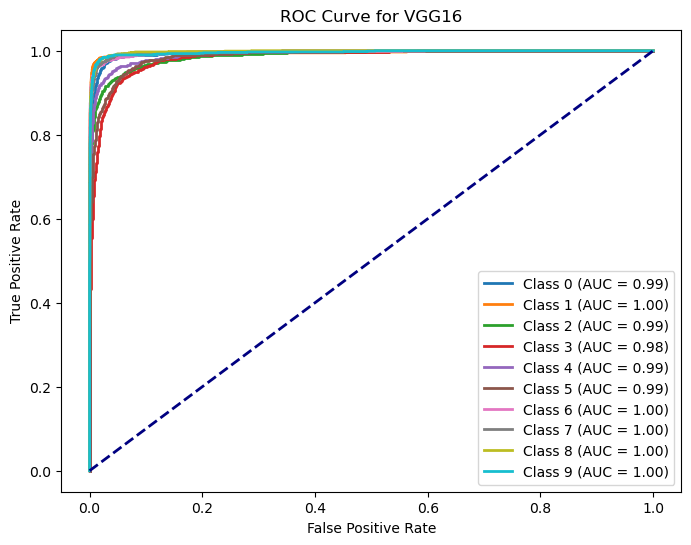

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
roc_auc = {}

for i in range(10): 
    fpr[i], tpr[i], _ = roc_curve(Yv_p[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(10):  
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for VGG16')
plt.legend(loc='lower right')
plt.show()


In [13]:
from sklearn.metrics import roc_auc_score

auc_roc = roc_auc_score(Yv_p, predictions)
print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.9926737555555555
